This chapter introduces tensor operations using TensorFlow, GradientTape(), gives a linear classifier example using TensorFlow and introduces the Keras API.  

In [8]:
print("This is my first code!")

This is my first code!


In [9]:
import tensorflow as tf

x = tf.zeros(shape=(2,5))
print(x)


tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(2, 5), dtype=float32)


TensorFlow tensors are not assignable! Need to create variables to assign values! To modify variables use the assign method!

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)
v.assign(tf.ones((3, 1)))
print(v)
v[0,0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.297655  ],
       [ 1.3076752 ],
       [-0.10415912]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


assign_add() and assign_sub() are requalivent to += and -=!

In [11]:
v = tf.Variable(initial_value=tf.ones(shape=(3,1)))
v.assign_add(tf.ones((3, 1)))
v.assign_sub(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


Here are some tensor operations using TensorFlow!

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

2022-04-05 22:55:29.448715: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


GradientTape can be used to compute the gradient of any differentiable expression! Useful for backpropagation!

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


Gradient tape is most commonly used to calculate the gradient of a loss function w.r.t its weights!
gradients = tape.gradient(loss, weights)

Only variables are tracked automatically by gradient tape, if you want to track any abritrry tensor you have to manually mark it for watching!

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


An example of a linear classifier!

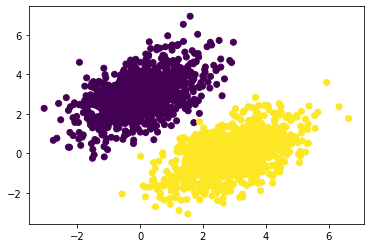

In [15]:
# Generate two classes of random points in 2D

import numpy as np
import matplotlib.pyplot as plt

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

#label them

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

#plot them
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [16]:
input_dim = 2 # 2D data!
output_dim = 1 # Yes or no!
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # initalise weights and biases randomly
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

#forward pass
def model(inputs):
    return tf.matmul(inputs, W) + b

#loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses) # reduce_mean averages the per-samples loss scores into a singular scalar loss value

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs) # computes the predictions of model by doing a forward pass
        loss = square_loss(targets, predictions) # calculates the loss using the square_loss function
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # calculates the gradient of the loss function wrt W and b seperately
    W.assign_sub(grad_loss_wrt_W * learning_rate) # updates the weights
    b.assign_sub(grad_loss_wrt_b * learning_rate) # updates the biases
    return loss

# for simplicity we will do batch training instead of mini-batch training, i.e. we will do training steps on the whole dataset since it isn't that large + easier to code
# doing batch training means we can do fewer training steps, and can use a larger learning rate!

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 5.6286
Loss at step 1: 0.7214
Loss at step 2: 0.2222
Loss at step 3: 0.1572
Loss at step 4: 0.1403
Loss at step 5: 0.1294
Loss at step 6: 0.1200
Loss at step 7: 0.1115
Loss at step 8: 0.1037
Loss at step 9: 0.0967
Loss at step 10: 0.0903
Loss at step 11: 0.0845
Loss at step 12: 0.0792
Loss at step 13: 0.0743
Loss at step 14: 0.0700
Loss at step 15: 0.0660
Loss at step 16: 0.0623
Loss at step 17: 0.0590
Loss at step 18: 0.0560
Loss at step 19: 0.0533
Loss at step 20: 0.0508
Loss at step 21: 0.0485
Loss at step 22: 0.0465
Loss at step 23: 0.0446
Loss at step 24: 0.0429
Loss at step 25: 0.0413
Loss at step 26: 0.0399
Loss at step 27: 0.0386
Loss at step 28: 0.0374
Loss at step 29: 0.0364
Loss at step 30: 0.0354
Loss at step 31: 0.0345
Loss at step 32: 0.0337
Loss at step 33: 0.0330
Loss at step 34: 0.0323
Loss at step 35: 0.0317
Loss at step 36: 0.0312
Loss at step 37: 0.0307
Loss at step 38: 0.0302
Loss at step 39: 0.0298


Lets make some predictions with the model!

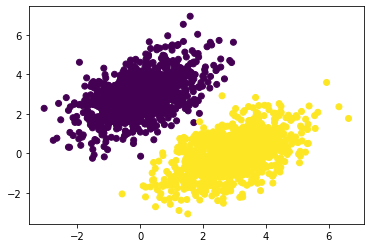

In [17]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

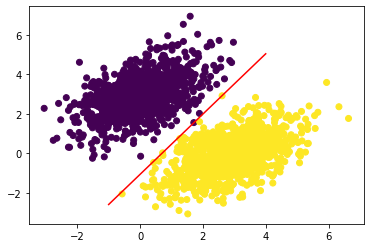

In [18]:
# This model is finding the equation of a line in the 2D plane, lets plot it!
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

The Keras API is centered around the Layer class, everything in Keras is either a Layer or something that closely interacts with a Layer!

In [19]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    # weights are typically defined in a build() method
    def build(self, input_shape): # input shape is the size of the input tensor from the previous layer in a model
        input_dim = input_shape[-1]

        # add_weight() is a shortcut method for creating weights, we could also define them using standalone variables like the comment below
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        # self.W = tf.Variable(tf.random.uniform(w_shape))
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")


    # define the forward pass of a layer
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu) # initiates our layer
input_tensor = tf.ones(shape=(2, 784)) 
output_tensor = my_dense(input_tensor) # calls the layer on the inputs,
print(output_tensor.shape)

    

(2, 32)


Here you can see we didn't actual use the call method, so why did we define it? Keras uses automatic shape inference when creating models, this means we don't explicitly pass the input tensor size to a layer in a model, it automatically infers it from the previous layers output shape! The build method is a dedicated state-creation method which recieves as an argument the first input shape seen by the layer, and is called automatically the first time the layer is called (via its __call__() method!) This is why we defined the computation in a seperate call() method rather than in __call__(). call() is used in the __call__() method! This approach allows Keras to handle the shape inference (plus a few other things!), while we still have control over what a forward pass through this layer looks like! 

The built in compile() method in Keras configures the training process:

In [20]:
import keras

model = keras.Sequential([keras.layers.Dense(1)]) # creates a sequential model
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=['accuracy']) # specifies the optimizer, the loss function and the metrics

# The strings passed in the compile() method are shortcuts that get converted into objects, "rmsprop" becomes keras.optimizers.RMSprop()
# We could pass the objects instead of the string shortcuts, useful for specifying arguments to these objects or using custom losses or metrics! 

Its VERY important that the loss function defines the success of the problem well, otherwise there may be unintended consequences! Usually unless you are working on truely new research you won't have to define your own loss function!

The fit() method implements the training loop itself: 

In [21]:
# The data (inputs and targets) is what the model will train on, the number of epochs is the number of times the training loop will iterate over all the data, the batch size is the sample size in the mini-batch SGD!

history = model.fit(inputs, targets, epochs=5, batch_size=128)

# The call to fit() returns a History object. This contains a history field (in this case history.history) which is a dictionary with mapping keys such as "loss" or specific metrics after each epoch!

Epoch 1/5
16/16 [==============================] - 1s 1ms/step - loss: 16.0406 - accuracy: 0.4325
Epoch 2/5
16/16 [==============================] - 0s 946us/step - loss: 15.4909 - accuracy: 0.4300
Epoch 3/5
16/16 [==============================] - 0s 919us/step - loss: 15.0250 - accuracy: 0.4275
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 14.5796 - accuracy: 0.4235
Epoch 5/5
16/16 [==============================] - 0s 853us/step - loss: 14.1484 - accuracy: 0.4210


In [26]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# this creates a training set and a validation set, it is important to evaluate the model on data it has never seen before!
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(training_inputs, training_targets, epochs=5, batch_size=16, validation_data=(val_inputs, val_targets))

Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.2122 - binary_accuracy: 0.9357 - val_loss: 0.0315 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0724 - binary_accuracy: 0.9579 - val_loss: 0.0274 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0696 - binary_accuracy: 0.9643 - val_loss: 0.0314 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0691 - binary_accuracy: 0.9614 - val_loss: 0.0268 - val_binary_accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0703 - binary_accuracy: 0.9550 - val_loss: 0.0710 - val_binary_accuracy: 0.9717


In [27]:
# the predict() method allows us to use our trained models!

predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.16982022]
 [0.75095975]
 [0.8008827 ]
 [0.76506466]
 [0.6614066 ]
 [0.19734305]
 [0.18269554]
 [0.00412431]
 [0.5969455 ]
 [0.76001215]]
